In [2]:
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input,SimpleRNN,LSTM,GRU,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from google.colab import files

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2.15.0


In [3]:
uploaded = files.upload()
df2 = pd.read_excel("/content/ST_11264500_Select_Boundary-Removed.xlsx", sheet_name='Mon_Normal', header=None)
select = df2.values.tolist()
df3 = pd.read_excel("/content/ST_11264500_Select_Boundary-Removed.xlsx", sheet_name='PCI_ND_Select', header=None)
select = df3.values.tolist()

selected_Num = 19

selection = []
i=0
for i in range(selected_Num):
  selection.append(select[0][i])

print(selection)


Saving ST_11264500_Select_Boundary-Removed.xlsx to ST_11264500_Select_Boundary-Removed.xlsx
[3, 6, 7, 12, 17, 19, 25, 55, 61, 69, 76, 81, 83, 92, 109, 118, 133, 159, 160]


[0.132210323222135, 0.158715236208676, 0.172995573871902, 0.214158820016737, 0.2652733844054, 0.296722309488338, 0.307315893347146, 0.264331554182997, 0.192421919048437, 0.158641384569773, 0.153985294681472, 0.168979331358368, 0.193977381569635, 0.184936185603569, 0.162452306937756, 0.17291574582111, 0.218829206715984, 0.279057907694976, 0.335481378911318, 0.361597259248851, 0.343990595460394, 0.318985957406149, 0.295536168106293, 0.257655392682782, 0.219141227152644, 0.182309683233069, 0.156465182479946, 0.170593593177338, 0.214955588666606, 0.267587821783308, 0.294839826178721, 0.287298383990234, 0.272444638407308, 0.254916467168271, 0.263528430366939, 0.28086241431, 0.279283431729524, 0.269422094154982, 0.254262108246305, 0.262073462466811, 0.274005218635365, 0.289662045353486, 0.302350719524949, 0.282321179663528, 0.277130923561778, 0.276336116496175, 0.256702051073926, 0.245918191273437, 0.211736323223197, 0.171390973188517, 0.176320629034514, 0.199586320165018, 0.247855206667047,

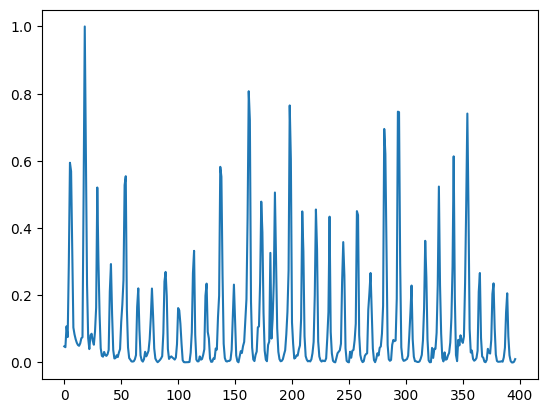

In [4]:
df3 = pd.read_excel("/content/ST_11264500_Select_Boundary-Removed.xlsx", sheet_name='Mon_Normal')
series = df3.values.tolist()

transposed_series = []
for i in range(len(series[0])):
    inner_list = []
    for j in range(len(series)):
        inner_list.append(series[j][i])
    transposed_series.append(inner_list)

series_selction = []

for i in range(len(selection)):
  series_selction.append(transposed_series[selection[i]-1])

print(series_selction[-1])
plt.plot(transposed_series[-1])
plt.show()


In [5]:
# N * T * D
T=10 #Timesteps in Sequence
D=len(selection) #Number of features
#N= Length of data set
Train = 0.7
Validation = 0.3


X=[]
Y=[]

for t in range(len(series_selction[0])-T):
  x=[]
  for j in range(T):
    IL=[]
    for i in range(D):
      IL.append(series_selction[i][t+j])
    x.append(IL)
  X.append(x)
  y=transposed_series[-1][t+T]
  Y.append(y)

X=np.array(X)
Y=np.array(Y)
N=len(X)

X_Train = X[:(int(N*Train))]
Y_Train = Y[:(int(N*Train))]

X_Validation = X[(T+int(N*Train)):(int(N*(Train+Validation)))]
Y_Validation = Y[(T+int(N*Train)):(int(N*(Train+Validation)))]

X_Test = X[(T+int(N*(Train+Validation))):]
Y_Test = Y[(T+int(N*(Train+Validation))):]


print("X_Train.shape ", X_Train.shape, "Y_Train.shape ", Y_Train.shape, "X_Validation.shape ", X_Validation.shape, "Y_Validation.shape ", Y_Validation.shape, "X_Test.shape ", X_Test.shape, "Y_Test.shape ", Y_Test.shape)


X_Train.shape  (270, 10, 19) Y_Train.shape  (270,) X_Validation.shape  (107, 10, 19) Y_Validation.shape  (107,) X_Test.shape  (0, 10, 19) Y_Test.shape  (0,)


0


Epoch 1/350
9/9 [==============================] - 2s 58ms/step - loss: 0.0301 - val_loss: 0.0289
Epoch 2/350
9/9 [==============================] - 0s 15ms/step - loss: 0.0266 - val_loss: 0.0243
Epoch 3/350
9/9 [==============================] - 0s 15ms/step - loss: 0.0235 - val_loss: 0.0211
Epoch 4/350
9/9 [==============================] - 0s 14ms/step - loss: 0.0210 - val_loss: 0.0188
Epoch 5/350
9/9 [==============================] - 0s 13ms/step - loss: 0.0192 - val_loss: 0.0171
Epoch 6/350
9/9 [==============================] - 0s 11ms/step - loss: 0.0178 - val_loss: 0.0158
Epoch 7/350
9/9 [==============================] - 0s 14ms/step - loss: 0.0170 - val_loss: 0.0159
Epoch 8/350
9/9 [==============================] - 0s 15ms/step - loss: 0.0165 - val_loss: 0.0141
Epoch 9/350
9/9 [==============================] - 0s 14ms/step - loss: 0.0158 - val_loss: 0.0145
Epoch 10/350
9/9 [==============================] - 0s 13ms/step - loss: 0.0164 - val_loss: 0.0133
Epoch 11/350
9/9 [=

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

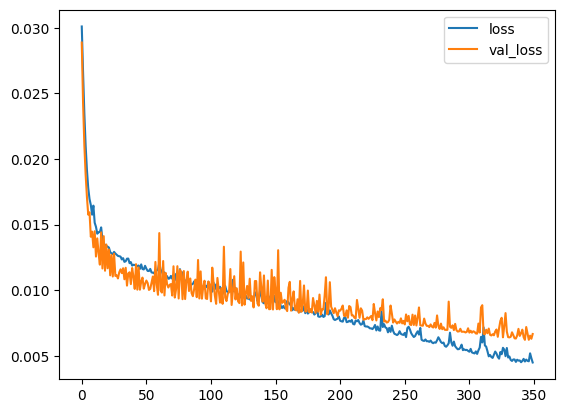

In [6]:
###Now try GRU/RNN/LSTM model
#SimpleRNN
#LSTM
#GRU

#SGD,Adam,RMSprop
#optimizer = SGD(lr=0.001, momentum=0.9)
#Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
#RMSprop(lr=0.001, rho=0.9)

#mse
#huber_loss
#smooth_l1_loss

#Activation Functions:
#relu
#sigmoid
#softmax
#softplus
#softsign
#tanh
#selu
#elu

df4= pd.DataFrame()
for ii in range(1):
  print(ii)

  Neuron_Number= 32
  activation_Function='sigmoid'


  # Define input layer
  i= Input(shape=(T,D))

  # Define LSTM layer
  x=GRU(Neuron_Number, activation_Function)(i)

  # Define output layer
  x=Dense(1)(x)

  # Create model with 1 hidden layer
  model=Model(i,x)

  #Increase the number of layers
  #model = tf.keras.Sequential([
  #    tf.keras.layers.LSTM(Neuron_Number, return_sequences=True, input_shape=(T,D)),
  #    tf.keras.layers.LSTM(Neuron_Number, return_sequences=True),
  #    tf.keras.layers.LSTM(Neuron_Number, return_sequences=True),
  #    tf.keras.layers.LSTM(Neuron_Number),
  #    tf.keras.layers.Dense(Neuron_Number, activation_Function)
  #])

  # Compile model
  model.compile(loss='mse', optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              )

  # Train model
  r=model.fit(X_Train, Y_Train,
      batch_size=32,
      epochs=350,
      validation_data=(X_Validation, Y_Validation),
  )

  import matplotlib.pyplot as plt
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()


#################################################################################
#Train Outputs

  Result=[]

  outputs=model.predict(X_Train)
  print(outputs.shape)
  predictions=outputs[:,0]

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(predictions, Y_Train))
  Result.append(rmse)

  # Print RMSE
  print('RMSE:', rmse)

  # Calculate NSE
  nse = 1 - np.sum((Y_Train - predictions)**2) / np.sum((Y_Train - np.mean(Y_Train))**2)
  Result.append(nse)

  # Print NSE
  print('NSE:', nse)

  # Calculate correlation
  correlation = np.corrcoef(Y_Train.T, predictions.T)[0, 1]
  Result.append(correlation)

  # Print correlation
  print('Correlation:', correlation)

  # Calculate MAE
  mae = mean_absolute_error(predictions, Y_Train)
  Result.append(mae)


  # Print MAE
  print('MAE:', mae)

  # Calculate PBIAS
  def pbias(observed, simulated):
      diff = np.sum(simulated - observed)
      avg_obs = np.mean(observed)
      return (diff / np.sum(observed)) * 100

  Result.append(pbias(Y_Train, predictions))

  # Print PBIAS
  print(f"PBIAS: {pbias(Y_Train, predictions):.2f}%")



  #plt.plot(Y_Train, label='targets')
  #plt.plot(predictions, label='predictions')
  #plt.title("Many to One RNN")
  #plt.legend()
  #plt.show()


#################################################################################
#Validation Outputs
# Make predictions using the trained model
  outputs=model.predict(X_Validation)
  print(outputs.shape)
  predictions_V=outputs[:,0]

  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(predictions_V, Y_Validation))
  Result.append(rmse)
  # Print RMSE
  print('RMSE:', rmse)

  # Calculate NSE
  nse = 1 - np.sum((Y_Validation - predictions_V)**2) / np.sum((Y_Validation - np.mean(Y_Validation))**2)
  Result.append(nse)
  # Print NSE
  print('NSE:', nse)

  # Calculate correlation
  correlation = np.corrcoef(Y_Validation.T, predictions_V.T)[0, 1]
  Result.append(correlation)
  # Print correlation
  print('Correlation:', correlation)

  # Calculate MAE
  mae = mean_absolute_error(predictions_V, Y_Validation)
  Result.append(mae)
  # Print MAE
  print('MAE:', mae)

  # Print PBIAS
  print(f"PBIAS: {pbias(Y_Validation, predictions_V):.2f}%")
  Result.append(pbias(Y_Validation, predictions_V))



  # Plot the predicted output value
  #plt.plot(Y_Validation, label='targets')
  #plt.plot(predictions_V, label='predictions')
  #plt.title("Many to One RNN")
  #plt.legend()
  #plt.show()

  #print('Result: ', Result)
  print('ii : ', ii)
  df3 = pd.DataFrame()
  df3 = pd.DataFrame(Result)
  print(df3)


  df4.loc[:,ii] = df3
  print(df4)

df4.to_excel('output.xlsx', index=False)
files.download('output.xlsx')

9/9 [==============================] - 0s 3ms/step
(270, 1)
RMSE: 0.06653747972689436
NSE: 0.8270456828853174
Correlation: 0.9140208691818111
MAE: 0.04590790466317767
PBIAS: 12.64%


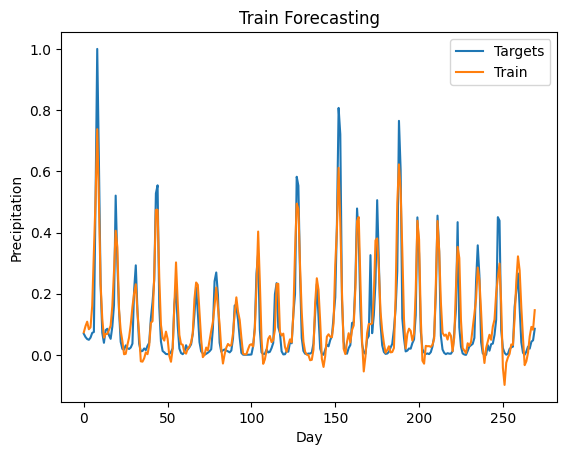

4/4 [==============================] - 0s 4ms/step
(107, 1)
RMSE: 0.08162515960528952
NSE: 0.7422573183893859
Correlation: 0.87245998330564
MAE: 0.058668104465872846
PBIAS: 21.77%


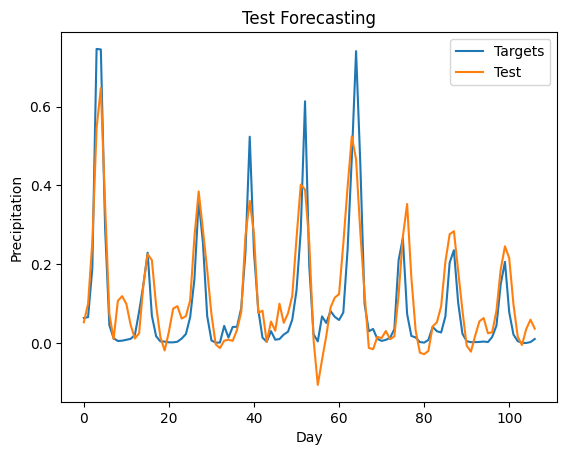

ii :  0


NameError: name 'df9' is not defined

In [7]:
#Train Outputs

Result=[]

outputs=model.predict(X_Train)
print(outputs.shape)
predictions=outputs[:,0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(predictions, Y_Train))
Result.append(rmse)

# Print RMSE
print('RMSE:', rmse)

# Calculate NSE
nse = 1 - np.sum((Y_Train - predictions)**2) / np.sum((Y_Train - np.mean(Y_Train))**2)
Result.append(nse)

# Print NSE
print('NSE:', nse)

# Calculate correlation
correlation = np.corrcoef(Y_Train.T, predictions.T)[0, 1]
Result.append(correlation)

# Print correlation
print('Correlation:', correlation)

# Calculate MAE
mae = mean_absolute_error(predictions, Y_Train)
Result.append(mae)

# Print MAE
print('MAE:', mae)

# Calculate PBIAS
def pbias(observed, simulated):
      diff = np.sum(simulated - observed)
      avg_obs = np.mean(observed)
      return (diff / np.sum(observed)) * 100

Result.append(pbias(Y_Train, predictions))

# Print PBIAS
print(f"PBIAS: {pbias(Y_Train, predictions):.2f}%")


plt.plot(Y_Train, label='Targets')
plt.plot(predictions, label='Train')
plt.title("Train Forecasting")
plt.xlabel("Day")  # Label for horizontal axis
plt.ylabel("Precipitation")  # Label for vertical axis
plt.legend()
plt.show()


#################################################################################
#Validation Outputs
# Make predictions using the trained model
outputs=model.predict(X_Validation)
print(outputs.shape)
predictions_V=outputs[:,0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(predictions_V, Y_Validation))
Result.append(rmse)
# Print RMSE
print('RMSE:', rmse)

# Calculate NSE
nse = 1 - np.sum((Y_Validation - predictions_V)**2) / np.sum((Y_Validation - np.mean(Y_Validation))**2)
Result.append(nse)
# Print NSE
print('NSE:', nse)

# Calculate correlation
correlation = np.corrcoef(Y_Validation.T, predictions_V.T)[0, 1]
Result.append(correlation)
# Print correlation
print('Correlation:', correlation)

# Calculate MAE
mae = mean_absolute_error(predictions_V, Y_Validation)
Result.append(mae)
# Print MAE
print('MAE:', mae)

# Print PBIAS
print(f"PBIAS: {pbias(Y_Validation, predictions_V):.2f}%")
Result.append(pbias(Y_Validation, predictions_V))


# Plot the predicted output value
plt.plot(Y_Validation, label='Targets')  # Y_Validation as precipitation
plt.plot(predictions_V, label='Test')  # predictions_V as day
plt.title("Test Forecasting")
plt.xlabel("Day")  # Label for horizontal axis
plt.ylabel("Precipitation")  # Label for vertical axis
plt.legend()
plt.show()

#print('Result: ', Result)
print('ii : ', ii)
df8 = pd.DataFrame()
df8 = pd.DataFrame(Result)

df9.loc[:,ii] = df8
print(df9)

df9.to_excel('output.xlsx', index=False)
files.download('output.xlsx')

df10 = pd.DataFrame()
df10 = pd.DataFrame(predictions)
df10.to_excel('P_Train.xlsx', index=False)
files.download('P_Train.xlsx')

df11 = pd.DataFrame()
df11 = pd.DataFrame(predictions_V)
df11.to_excel('P_Validation.xlsx', index=False)
files.download('P_Validation.xlsx')
